In [ ]:
def iStress():
    time_forceMean = np.zeros([N_steps, 3])
    time_stress = np.zeros([N_steps, 3])
    fxMean = 0;fyMean = 0;fzMean = 0;
    for i in range(N[0]):
        for j in range(N[1]):
            for k in range(N[2]):
                fxMean+=force_grid[t][i][j][k][0]
                fyMean+=force_grid[t][i][j][k][1]
                fzMean+=force_grid[t][i][j][k][2]
    fxMean = fxMean/N[0];fyMean = fyMean/N[1];fzMean = fzMean/N[2];
    istress = np.array([fxMean/(N[1]*N[2]*ial**2), fyMean/(N[2]*N[0]*ial**2), fzMean/(N[1]*N[0]*ial**2)])
    iforceMean = np.array([fxMean, fyMean, fzMean])
    return time_forceMean, time_stress

In [10]:
from IPython.display import clear_output
time_grid = np.zeros([2,N[0],N[1],N[2],3])
time_grid[0] = np.array([xyz_grid])
force_grid = np.zeros([2, N[0], N[1], N[2
                                       ],3])
t=0
while(time_grid[1].all!=time_grid[0].all):
    
    for i in range(N[0]):
        for j in range(N[1]):
            for k in range(N[2]):
                fx=0; fy=0; fz=0
                fx += forceXLJ3(i, j, k, xyz_grid)
                fy += forceYLJ3(i, j, k, xyz_grid)
                fz += forceZLJ3(i, j, k, xyz_grid)
                #fx, fy, fz += forceLJ3(i, j, k, xyz_grid)
                acc += (fx/mass) + force_grid[0, i, j, k , 0]
                xj=verlet_pos(time_grid[0][i][j][k][0],t,ts,acc)
                yj=verlet_pos(time_grid[0][i][j][k][1], t, ts, 
                              fy/mass)
                zj=verlet_pos(time_grid[0][i][j][k][2], t, ts, 
                              fz/mass)
                time_grid[1][i][j][k][0] = xj
                time_grid[1][i][j][k][1] = yj
                time_grid[1][i][j][k][2] = zj
                
                #force_grid[0][i][j][k][0] = fx;force_grid[0][i][j][k][1] = fy;force_grid[0][i][j][k][2] = fz
    clear_output()
    print(t)
    time_grid[0]=time_grid[1]
    #force_grid[1]=force_grid[0]
    t+=1

85194


KeyboardInterrupt: 

In [ ]:
n=8
#fig, axs = plt.subplot(1,2)

plot(time_strainMean[:n,0], time_stress[:n,0])
plt.show()
scatter(time_strainMean[:n,0], time_stress[:n,0]/1e-14)
plt.show()

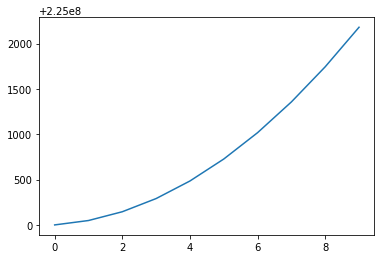

In [27]:
plot(range(N_steps), time_stress_applied[:,0])

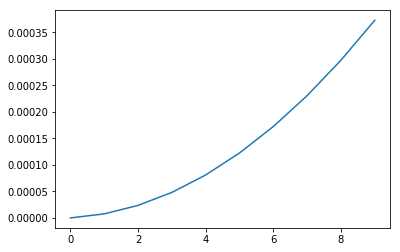

In [28]:
plot(range(N_steps), time_strainMean[:,0])

In [29]:
print(time_stress_applied)

[[2.25000000e+08 0.00000000e+00 0.00000000e+00]
 [2.25000048e+08 0.00000000e+00 0.00000000e+00]
 [2.25000145e+08 0.00000000e+00 0.00000000e+00]
 [2.25000291e+08 0.00000000e+00 0.00000000e+00]
 [2.25000484e+08 0.00000000e+00 0.00000000e+00]
 [2.25000727e+08 0.00000000e+00 0.00000000e+00]
 [2.25001017e+08 0.00000000e+00 0.00000000e+00]
 [2.25001356e+08 0.00000000e+00 0.00000000e+00]
 [2.25001744e+08 0.00000000e+00 0.00000000e+00]
 [2.25002180e+08 0.00000000e+00 0.00000000e+00]]
